In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("crime_data_set.csv")

In [4]:
df.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,1,ak,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,2,al,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,3,ar,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,4,az,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,5,ca,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5


In [5]:
df.columns

Index(['sid', 'state', 'crime', 'murder', 'pctmetro', 'pctwhite', 'pcths',
       'poverty', 'single'],
      dtype='object')

1. Run a multiple regression using crime as dependent variable, and murder, pctmetro,
pctwhite, pcths, poverty, single as explanatory variables.


In [7]:
X = df[['murder', 'pctmetro', 'pctwhite', 'pcths', 'poverty', 'single']]
y = df['crime']

In [8]:
import statsmodels.api as sm

In [9]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     62.51
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.52e-20
Time:                        10:44:58   Log-Likelihood:                -324.94
No. Observations:                  51   AIC:                             663.9
Df Residuals:                      44   BIC:                             677.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1143.7912    584.999     -1.955      0.0

2. Split the data into training(40 observations) and testing sets (10 observations)

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=40, test_size=10, random_state=42)

3. Choose all or several variables which you hypothesize to affect the crime and run a
multiple regression using crime as dependent variable using the train data set

In [13]:
X_train_hyp = X_train[['murder', 'poverty', 'single']]

In [15]:
X_train_hyp = sm.add_constant(X_train_hyp)
model_train = sm.OLS(y_train, X_train_hyp).fit()

In [16]:
print(model_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     65.92
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.07e-14
Time:                        10:52:27   Log-Likelihood:                -265.57
No. Observations:                  40   AIC:                             539.1
Df Residuals:                      36   BIC:                             545.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -740.2234    351.883     -2.104      0.0

4. Use the model from the previous step and independent variables from the test data set
to get predicted crime and explain why you need to use the independent variables from
the test data.


In [17]:
X_test_hyp = X_test[['murder', 'poverty', 'single']]

In [18]:
X_test_hyp = sm.add_constant(X_test_hyp)

In [19]:
y_pred = model_train.predict(X_test_hyp)

In [20]:
print(y_pred)

43     360.237117
40     351.194759
46     572.315282
12     338.209025
24    1150.517735
31     879.377153
17    1317.451119
32     708.687408
3      711.585099
30     367.536082
dtype: float64


We need to use the independent variables from the test dataset to make sure how well the model can generate unseen data. We can understand whether the relationships learned by the model during training hold true when applied to test data. This is helpful for determining the model's performance and avoids overfitting to the training data.

5. Calculate MSE using the predictions from the previous step and actual crime from the
test data set

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_pred)

In [23]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 70666.69475273641


The number is too high, so I decided to do another test with other variables, those which are statistically significant in OLS - murder, pcmetro, single

6. Based on the MSE choose the model which performs better on the test set

In [24]:
X_train_sig = X_train[['murder', 'pctmetro', 'single']]
X_test_sig = X_test[['murder', 'pctmetro', 'single']]

X_train_sig = sm.add_constant(X_train_sig)
X_test_sig = sm.add_constant(X_test_sig)

In [25]:
model_sig = sm.OLS(y_train, X_train_sig).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.75e-19
Time:                        11:14:58   Log-Likelihood:                -254.93
No. Observations:                  40   AIC:                             517.9
Df Residuals:                      36   BIC:                             524.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -885.1794    251.762     -3.516      0.0

In [26]:
y_pred_sig = model_sig.predict(X_test_sig)

In [27]:
print(y_pred_sig)

43     480.776068
40     145.020460
46     692.485089
12     126.626162
24     747.562037
31     737.108517
17    1181.123260
32     858.307085
3      799.701915
30     637.171678
dtype: float64


In [28]:
mse_sig = mean_squared_error(y_test, y_pred_sig)
print(f'MSE for the model with statistically significant variables: {mse_sig}')

MSE for the model with statistically significant variables: 24920.30002686324


One more try using all variables

In [29]:
X_test_all = X_test[['murder', 'pctmetro', 'pctwhite', 'pcths', 'poverty', 'single']]
X_test_all = sm.add_constant(X_test_all)

X_train_all = X_train[['murder', 'pctmetro', 'pctwhite', 'pcths', 'poverty', 'single']]
X_train_all = sm.add_constant(X_train_all)
model_all = sm.OLS(y_train, X_train_all).fit()

y_pred_all = model_all.predict(X_test_all)

mse_model_2 = mean_squared_error(y_test, y_pred_all)
print(f'MSE for Model 2: {mse_model_2}')

MSE for Model 2: 58175.9892983428


The lowest MSE I got from "model_sig",

MSE for the model with statistically significant variables: 24920.30002686324

so this one performs better

7. Based on the final model, predict the crime rate for a state with murder=10, pctmetro=80,
pctwhite=75, pcths=70, poverty=15, single=12


In [46]:
new_data = pd.DataFrame({
    'murder': [10],
    'pctmetro': [80],
    'single': [12]
})
print(new_data)

   murder  pctmetro  single
0      10        80      12


In [47]:
new_data = sm.add_constant(new_data, has_constant='add')
new_data = new_data[['const', 'murder', 'pctmetro', 'single']]


In [48]:
predicted_crime = model_sig.predict(new_data)
print(f"Predicted crime rate for the state: {predicted_crime[0]}")

Predicted crime rate for the state: 787.3623973556403


8. Use Regression Tree analysis method to predict crime rate (y) using train data set.

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
tree_model = DecisionTreeRegressor(max_depth=1)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [57]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

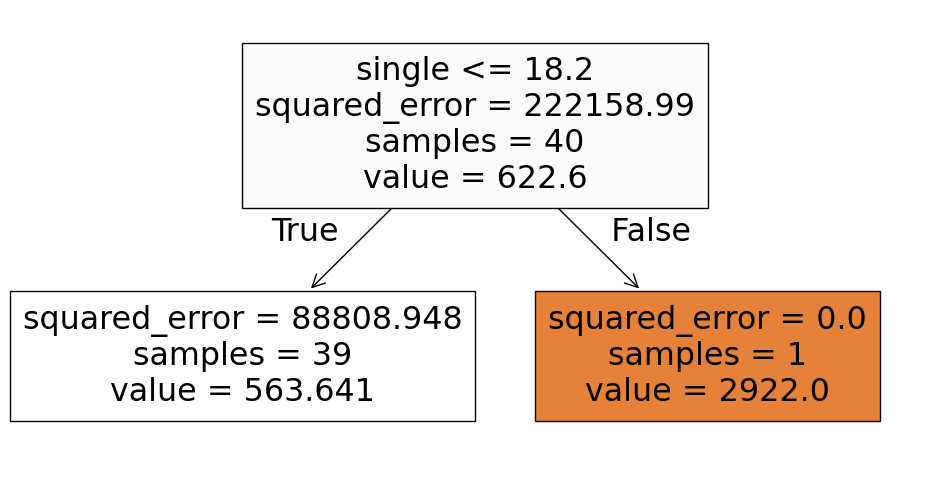

In [58]:
plt.figure(figsize=(12,6))
plot_tree(tree_model,
         feature_names=X_train.columns,
          filled=True)

plt.show()

In [62]:
y_pred_tree = tree_model.predict(X_train)

In [63]:
print(y_pred_tree)

[ 563.64102564  563.64102564  563.64102564  563.64102564  563.64102564
  563.64102564  563.64102564  563.64102564  563.64102564  563.64102564
  563.64102564  563.64102564  563.64102564  563.64102564  563.64102564
  563.64102564  563.64102564  563.64102564  563.64102564  563.64102564
  563.64102564  563.64102564  563.64102564  563.64102564  563.64102564
  563.64102564  563.64102564  563.64102564  563.64102564  563.64102564
  563.64102564  563.64102564  563.64102564  563.64102564 2922.
  563.64102564  563.64102564  563.64102564  563.64102564  563.64102564]


9. Get predictions based on the test data set and calculate MSE using test dataset.

In [64]:
y_pred_tree_test = tree_model.predict(X_test)

In [65]:
print(y_pred_tree_test)

[563.64102564 563.64102564 563.64102564 563.64102564 563.64102564
 563.64102564 563.64102564 563.64102564 563.64102564 563.64102564]


In [66]:
mse_test = mean_squared_error(y_test, y_pred_tree_test)
print(f"MSE on test data: {mse_test}")

MSE on test data: 80040.41347797502


10. Choose the tree with lowest MSE on test data by calibrating minimum samples in the
leaf and maximum depth of the tree. Compare the results with MSE obtained in part (6).

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [73]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10]})

In [74]:
best_tree_model = grid_search.best_estimator_
y_pred_best = best_tree_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best MSE on test data: {mse_best}")

print(f"Initial MSE: {mse_test}, Optimized MSE: {mse_best}")

Best MSE on test data: 31284.164790123457
Initial MSE: 80040.41347797502, Optimized MSE: 31284.164790123457


11. Plot the regression tree.

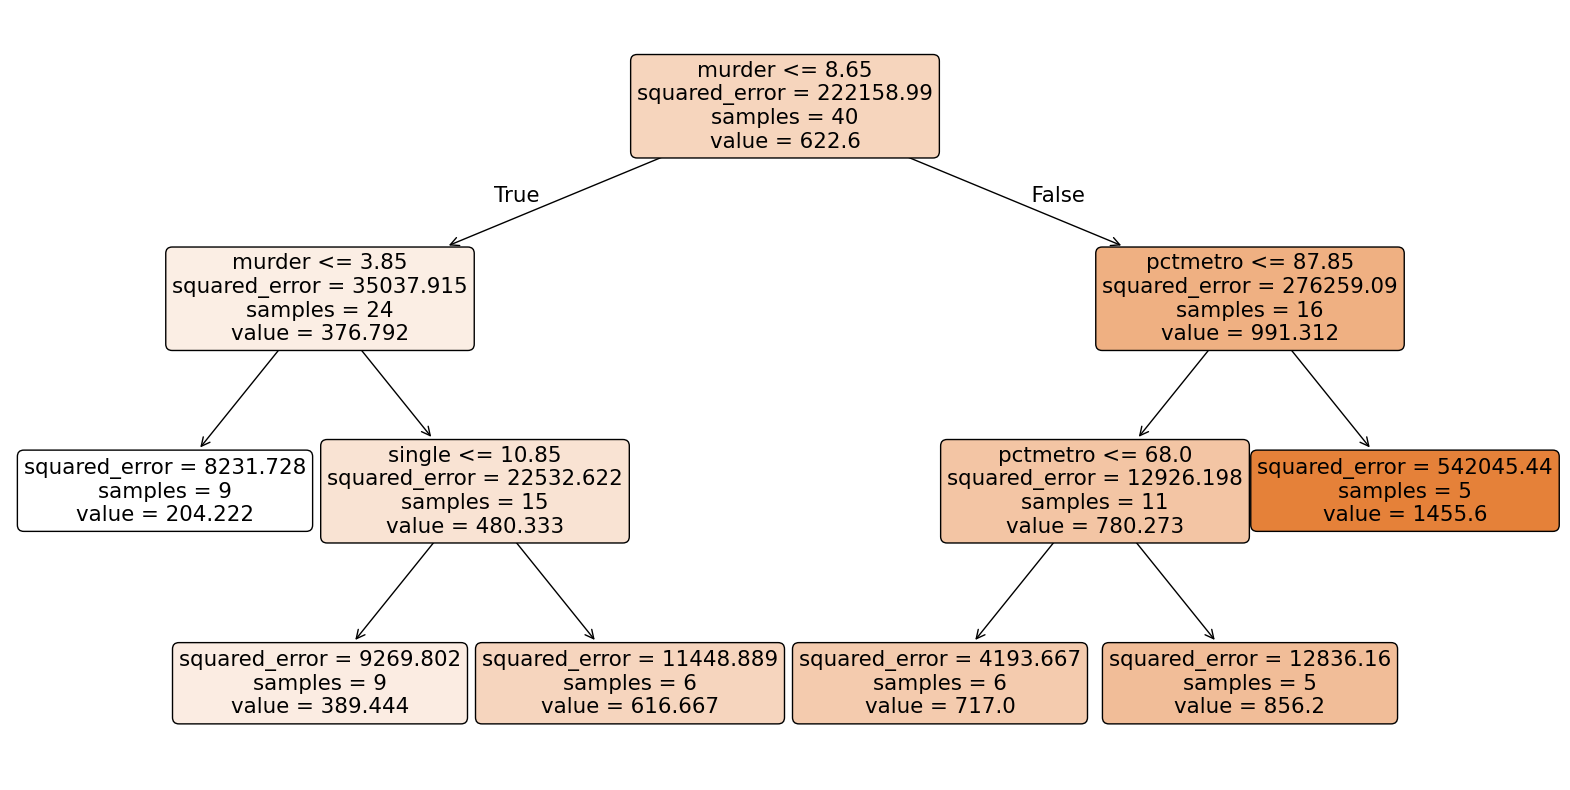

In [75]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

12. Based on the tree predict the crime rate for a state with murder=10, pctmetro=80,
pctwhite=75, pcths=70, poverty=15, single=12. Compare the prediction with part (7).

In [78]:
state_features = [[10, 80, 75, 70, 15, 12, 0]]

crime_rate_prediction = best_tree_model.predict(state_features)
print(f"Predicted crime rate: {crime_rate_prediction}")
print(f"Comparison with part 7: Predicted: {crime_rate_prediction}, Part 7 result: {predicted_crime}")

Predicted crime rate: [856.2]
Comparison with part 7: Predicted: [856.2], Part 7 result: 0    787.362397
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


13. Get feature importances of independent variables and compare them with the results in
part (1)

In [80]:
feature_importances = best_tree_model.feature_importances_
features = X_train.columns

importance_dict = dict(zip(features, feature_importances))
print("Feature Importances: ", importance_dict)


Feature Importances:  {'const': 0.0, 'murder': 0.6917638786413084, 'pctmetro': 0.2765212230307241, 'pctwhite': 0.0, 'pcths': 0.0, 'poverty': 0.0, 'single': 0.03171489832796752}


From part 1 we have to take the coefficients and p-values to determine significance

murder: Coefficient = 19.33,  significant (p-value < 0.001)

pctmetro: Coefficient = 6.62,  significant (p-value < 0.001)

pctwhite: Coefficient = -0.70, not significant (p-value = 0.78)

pcths: Coefficient = 4.79, not significant (p-value = 0.48)

poverty: Coefficient = 15.01, not significant (p-value = 0.13)

single: Coefficient = 54.85, significant (p-value = 0.013)

In regression tree:

murder: 0.692 (dominant feature)

pctmetro: 0.277 (significant)

pctwhite: 0.0 (not used in the model)

pcths: 0.0 (not used in the model)

poverty: 0.0 (not used in the model)

single: 0.032 (minimal importance)

Both models agree on the importance of murder and pctmetro.

Both models discard pctwhite and pcths as irrelevant.

single is significant in the OLS model but has minimal importance in the tree.